# Task 1

Download the dataset "Pizza or not Pizza" from Kaggle.com.
https://www.kaggle.com/datasets/carlosrunner/pizza-not-pizza/data

# Task 2

Place the `pizza_not_pizza` folder in your Colab-Environment. (On the same level as this notebook)
```
|
|-- pizza_not_pizza
|   |-- pizza
|   `-- not_pizza
`-- Assignment_CNN-Part-1.ipynb
```
# Task 3

Set up a data generator and use it to build a training and a test dataset. This can be done by using the `flow_from_directory` function of the data generator. Checkout the documentation for details:
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

In order to confirm wether you set up the data correctly try fitting the model provided below. If you get an output from the `fit` function everything is fine.

Tips:
- Remember to rescale the pixel values
- Set the size of the test dataset to 0.2 of the original dataset size.
- Be sure to use the constants defined at the beginning of this notebook.

# Task 4

Add three augmentation options to the data generator. For each one think about why it might makes sense to use this augmentation technique here. Can you improve the validation accuracy?

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [32]:
DATA_DIR = "/content/drive/MyDrive/pizza_not_pizza"
BATCH_SIZE = 20
IMAGE_HEIGHT = 300
IMAGE_WIDTH = 300

In [33]:
# Start code here ==>
data_generator = ImageDataGenerator( rescale = 1.0/255. )

train_datagen = ImageDataGenerator(

          rescale=1./255,
          validation_split=0.2,  # Use 20% of the data for validation
)

train_generator = train_datagen.flow_from_directory(
    DATA_DIR,
    batch_size  = 20,
    class_mode  = 'binary',
    target_size = (300, 300),
    subset = 'training'

)

validation_generator = train_datagen.flow_from_directory(
    DATA_DIR,
    batch_size  = 20,
    class_mode  = 'binary',
    target_size = (300, 300),
    subset = 'validation'
)



# End code here <==

# Expected output: (Your numbers of images might be different.)
# Found 1574 images belonging to 2 classes.
# Found 392 images belonging to 2 classes.

Found 1574 images belonging to 2 classes.
Found 392 images belonging to 2 classes.


In [34]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation="relu", input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(16, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

In [35]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 20,
            epochs = 10,
            validation_steps = 10,
            verbose = 2)

Epoch 1/10
20/20 - 104s - loss: 0.7989 - accuracy: 0.4900 - val_loss: 0.6928 - val_accuracy: 0.5250 - 104s/epoch - 5s/step
Epoch 2/10
20/20 - 109s - loss: 0.6939 - accuracy: 0.5375 - val_loss: 0.7126 - val_accuracy: 0.4950 - 109s/epoch - 5s/step
Epoch 3/10
20/20 - 106s - loss: 0.6914 - accuracy: 0.5275 - val_loss: 0.6589 - val_accuracy: 0.6400 - 106s/epoch - 5s/step
Epoch 4/10
20/20 - 100s - loss: 0.6851 - accuracy: 0.5875 - val_loss: 0.6396 - val_accuracy: 0.5900 - 100s/epoch - 5s/step
Epoch 5/10
20/20 - 102s - loss: 0.6700 - accuracy: 0.6000 - val_loss: 0.6543 - val_accuracy: 0.5700 - 102s/epoch - 5s/step
Epoch 6/10
20/20 - 100s - loss: 0.6513 - accuracy: 0.6175 - val_loss: 0.6116 - val_accuracy: 0.6500 - 100s/epoch - 5s/step
Epoch 7/10
20/20 - 94s - loss: 0.6344 - accuracy: 0.6300 - val_loss: 0.5806 - val_accuracy: 0.6950 - 94s/epoch - 5s/step
Epoch 8/10
20/20 - 103s - loss: 0.5869 - accuracy: 0.6800 - val_loss: 0.6075 - val_accuracy: 0.6400 - 103s/epoch - 5s/step
Epoch 9/10
20/20 -

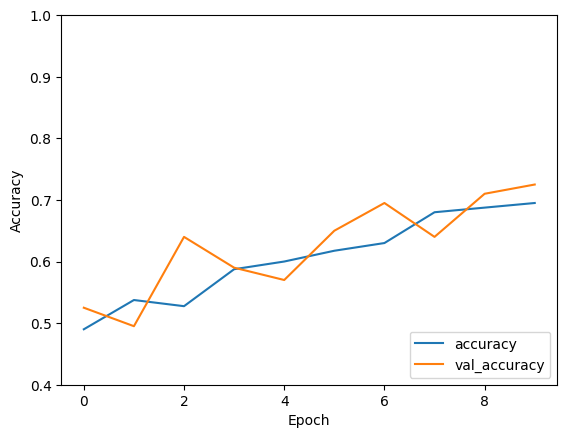

In [37]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.4, 1])
plt.legend(loc='lower right')

